# Introducrtion to Machine Learning: Assignment #1
## Submission date: 28\5\2024, 23:59.
### Topics:
- Naïve bayes
- Gaussian Bayes
- Parzen Windows
- KNN

Submitted by:

 **Student 1 Obaida Khateeb + 201278066

 **Student 2 Maya Atwan + 314813494

**Assignment Instruction:**

· Submissions in pairs only.

· Try to keep the code as clean, concise, and short as possible

· If you wish to work in your IDE, you can, but you **must**,  insert the script back to the matching cells of the notebook and run the code. <br/>Only the notebook will be submitted in moodle (in `.ipynb` format).

· <font color='red'>Please write your answers to question in red</font>.

**Important:** All plots, results and outputs should be included in the notebook as the cells' outputs (run all cells and do not clear the output). <br/>

**Important:** Your submission must be entirely your own. Any attempts of plagiarism (including ChatGPT) will lead to grade 0 and disciplinary actions.


## Customizing Colab
This is an optional section for you convenience:<br/>
Go to Tools -> Settings -> editor<br/>
There, you can adjust fonts, add line numbers, change indentations.

## Question 1 - Bayesian Classification Assuming Gaussian distribution
You are requested by the Central Bank of America to detect between three types of bankotes: fake, fine, and good. The dataset consists of 5 features which were obtained from the digitized images of banknotes.<br/>
Since the data is continuous, you will implement Gaussian bayes and compare to Gaussian naïve bayes.




import libraries

In [268]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

Load the wine dataset from https://sharon.srworkspace.com/ml/datasets/hw1/banknote_authentication.csv

In [269]:
# Implement here
url = "https://sharon.srworkspace.com/ml/datasets/hw1/banknote_authentication.csv"
df = pd.read_csv(url)
print(df.shape)
df.head(3)

(600, 6)


,contrast,skew,curtosis,heat,cent_col,Class
0,2.446909,2.702995,0.832495,0.531505,-1.734316,0
1,0.870104,2.248493,-1.496408,1.383379,-1.216271,0
2,-1.930227,-2.708964,1.031232,-0.125341,0.683788,2


Check if there is even potential for gaussian assumption to work here, by plotting the density of the features (without target label!), using plotting for data frames. <br/>
Should gaussian bayes work here? <br/>
<font color='red'>Write here your answer and explain it:</br> Based on the density plots of the features, each of them resembles a bell shaped curve, in addition the curve look symmetrically spreaded around the peak (the data that are right to the peak almost equal to the data that are left to the peak). These two properties of the plots indicates that the features tend to follow a normal distribution, therefore a hight possibility that gaussian bayes could work here</font>

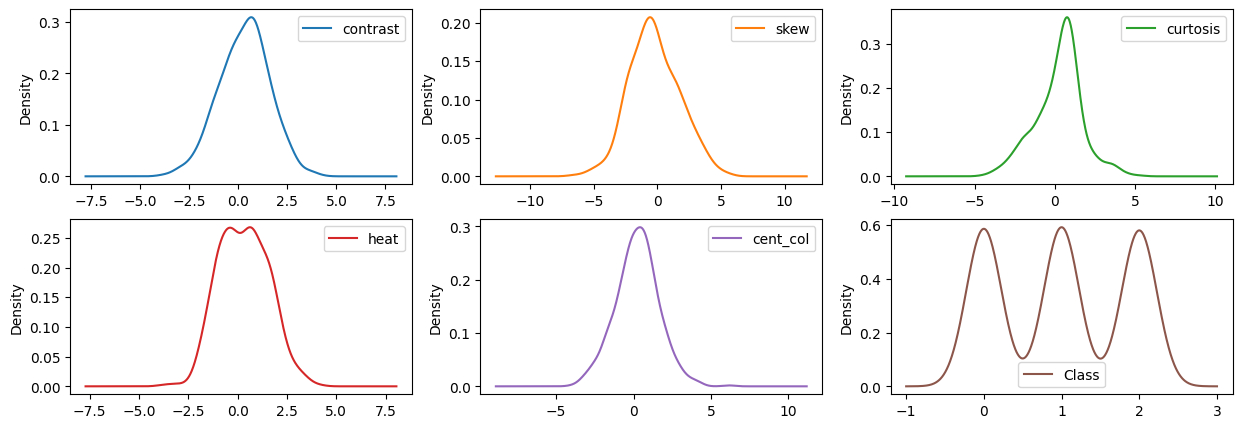

In [270]:
df.plot(kind='density', subplots=True, layout=(2,3), figsize=(15, 5), sharex=False)
plt.show()

Convert the data to numpy and split the data to 80% training and 20% test with random state of 33. Make sure to maintain the dataset balanced, using stratify=y, in train_test_split method.
<br/>Note that the data frame currently includes the labels as well.

In [271]:
arr = np.array(df)
X = arr[:, :-1]
Y = arr[:, -1]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=33, stratify=Y)

Implement the functions below. <br/>Both get test data $X\in\mathbb{R}^{n\times d}$ and returns the predicted classes (vector sized n), but the naïve bayes assumes that the features are independent.<br/>
Hint for efficient implementation: you don't need more than one loop, use numpy!

In [272]:
def classify_point_gaussian_bayes(x_test):
    global y_train

    # Calculating priors
    class_labels = np.unique(y_train)  # extracting the different classes
    priors = np.array([np.mean(y_train == c) for c in class_labels])

    # Calculating for each class the means and covariance matrices
    means = np.array([x_train[y_train == c].mean(axis=0) for c in class_labels])
    covs = np.array([np.cov(x_train[y_train == c], rowvar=False) for c in class_labels])

    # Precomputing inverse and determinant of covariance matrices
    inv_covs = np.array([np.linalg.inv(cov) for cov in covs])
    log_dets = np.array([np.log(np.linalg.det(cov)+0.00000001) for cov in covs])
    log_priors=np.log(priors)

    # Computing log-likelihoods
    log_likelihoods = np.zeros((x_test.shape[0], len(class_labels)))

    for i, (mean, inv_cov, log_det, log_prior) in enumerate(zip(means, inv_covs, log_dets, log_priors)):
        diff = x_test - mean
        log_likelihoods[:, i] = -0.5 * (np.sum(diff @ inv_cov * diff, axis=1) + log_det) + log_prior

    # Choosing the class with the highest log likelihood for each sample
    predictions = class_labels[np.argmax(log_likelihoods, axis=1)]
    return predictions

def classify_point_gaussian_naive_bayes(x_test):
    # Calculating priors
    class_labels = np.unique(y_train)  # extracting the different classes
    priors = np.array([np.mean(y_train == c) for c in class_labels])

    # Calculating for each class the means and variances of each feature across all training samples that belong to that class
    means = np.array([x_train[y_train == c].mean(axis=0) for c in class_labels])
    variances = np.array([x_train[y_train == c].var(axis=0) for c in class_labels])

    # Calculating the log of the prior for each class
    log_priors = np.log(priors)

    # Computing the log-likelihood for each sample and for each class
    log_likelihoods = np.zeros((x_test.shape[0], len(class_labels)))
    for i, (mean, var, log_prior) in enumerate(zip(means, variances, log_priors)):
        log_likelihoods[:, i] = - 0.5 * np.sum(np.log(2 * np.pi * var) + ((x_test - mean) ** 2) / var, axis=1)+log_prior

    # Choose the class with the highest log likelihood for each sample
    predictions = class_labels[np.argmax(log_likelihoods, axis=1)]
    return predictions


For both GB and GNB, we will look at train vs test. Answer the following:
- Which model achieved better learning? Why?
- Could the other model be sometimes better? How, for example?

<font color='red'>Write here your answers and explain:<br> </br>
- Based on the result we received, the GB achieved better learning compared to the GNB,the reason behind this could be the way the classifires handle the realtionships between features. GB uses the full covariance matrix though so it takes in consideration the dependencies in between the features. GNB, in the other hand, assumes that there is independence between features. Thats what make the GB more accurate than GNB.<br>
- Yes, GNB can in some cases yield a better results than GB, especially when there is a large number of features compared to the number of samples, which is associated with a high possibility of overfitting occurence, in this case assuming independece between features can get us better results. Another cases where GNB can achieve better results is having a small dataset and independence between features, were the complexity of GNB make it advantageable over GB.</font>


<br/>Hint: Use the next section, for visualization the correlation matrix on the train.  


In [273]:
# Reminder: success rate is the precentage of correctly classified data within the number of all data in the test set.

dict1 = {'GB': [], 'GNB': []}

accs = classify_point_gaussian_bayes(x_train)
dict1['GB'].append(np.count_nonzero(accs == y_train) / len(y_train))

accs = classify_point_gaussian_bayes(x_test)
dict1['GB'].append(np.count_nonzero(accs == y_test) / len(y_test))

accs = classify_point_gaussian_naive_bayes(x_train)
dict1['GNB'].append(np.count_nonzero(accs == y_train) / len(y_train))

accs = classify_point_gaussian_naive_bayes(x_test)
dict1['GNB'].append(np.count_nonzero(accs == y_test) / len(y_test))

df = pd.DataFrame(dict1, columns=['GB', 'GNB'], index=['train', 'test'])
print(df)

            GB       GNB
train  0.94375  0.850000
test   0.92500  0.833333


Its not enough! We want to get even better test results. <br/>
Please look at the train correlation matrix.
- Choose one feature to remove and explain why you chose it.
- If we continue to remove features, what do you expect to happend with the train error?
<br></br>
-
<font color='red'>The correlation matrix showed a two high correlated features (correlation rate of -0.92) which are cent_col and skew. However, improvement in the prediction accuracy rate was obtained only when removing cent_col (skew made the accuracy decrease although not by so much). cent_col seems to be redundant , because of its high correlation with skew, which means it's almost represented by skew , so it doesn't contribute to the differences between the samples, and don't add a classification value, only contribute to overfitting, in this case removing it could improve the accuracy rate, a thing is evidenced by the better accuracy achieved when doing so.<br/>- Continuing to remove features, other than the first feature removing (were we removed cent_col previously), going to make the accuracy worse, that's resulted from the fact that these features characterize the phonemona and, unlike cent_col, are not covered by other features, then removing them will keep us with small numbers of features, not enough for achieving accurate classification</font>

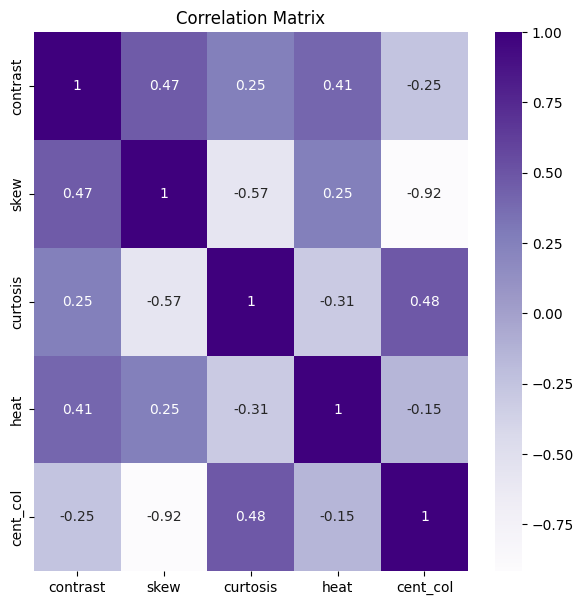

In [274]:
df = pd.read_csv(url)
# Visualize the correlation matrix
df_backup = df.drop(columns=['Class'])
plt.subplots(figsize=(7, 7))
sns.heatmap(df_backup.corr(), annot=True, cmap='Purples')
plt.title('Correlation Matrix')
plt.show()

Adjust the data according to your decision and print again the train and test for both models.

In [275]:
# Change here the train and the test according to the feature you chose to remove

X_train_reduced = np.delete(x_train, 4, axis=1)
X_test_reduced = np.delete(x_test, 4, axis=1)
x_train=X_train_reduced
x_test=X_test_reduced

dict1 = {'GB': [], 'GNB': []}
accs = classify_point_gaussian_bayes(x_train)
dict1['GB'].append(np.count_nonzero(accs == y_train) / len(y_train))

accs = classify_point_gaussian_bayes(x_test)
dict1['GB'].append(np.count_nonzero(accs == y_test) / len(y_test))

accs = classify_point_gaussian_naive_bayes(x_train)
dict1['GNB'].append(np.count_nonzero(accs == y_train) / len(y_train))

accs = classify_point_gaussian_naive_bayes(x_test)
dict1['GNB'].append(np.count_nonzero(accs == y_test) / len(y_test))

df = pd.DataFrame(dict1, columns=['GB', 'GNB'], index=['train', 'test'])
print(df)


             GB       GNB
train  0.952083  0.845833
test   0.941667  0.866667


Run the boundaries plotting for (scaled) train and test with gaussian bayes.<br/>It will show the decision boundaries as saw in the lectures.

In [276]:
# Essential for the visualization

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

(8178, 4)


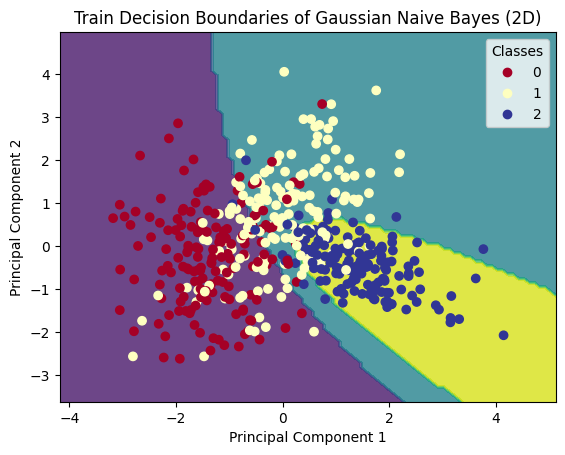

In [277]:
#@title Train Decision Boundaries of Gaussian Naive Bayes (2D)

from sklearn.decomposition import PCA
from tqdm import tqdm

# Reduce the dimensionality of the data to 2 using PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(x_train)

# Create a grid of points for visualization in the reduced 2D space
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Use the GNB model to predict class labels for the grid points in the original 13D space
grid_points = pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()])
print(grid_points.shape)
Z = classify_point_gaussian_naive_bayes(grid_points)
Z = Z.reshape(xx.shape)

# Plot the decision boundaries and the data points in the reduced 2D space
plt.contourf(xx, yy, Z, alpha=0.8)
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_train, cmap=plt.cm.RdYlBu)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add a legend
handles, labels = scatter.legend_elements()
plt.legend(handles, labels, title='Classes')

plt.title('Train Decision Boundaries of Gaussian Naive Bayes (2D)')
plt.show()

(7031, 4)


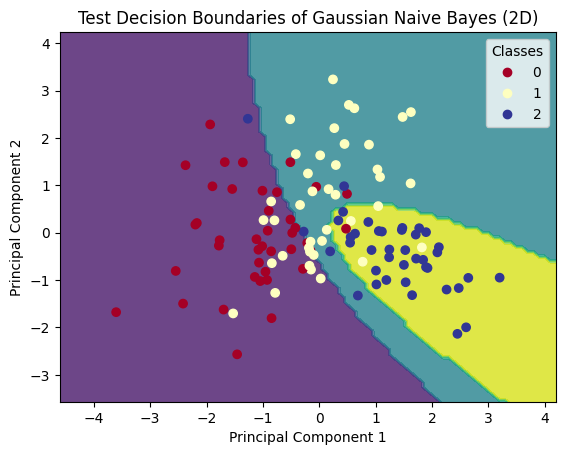

In [278]:
#@title Train Decision Boundaries of Gaussian Naive Bayes (2D)

from sklearn.decomposition import PCA
from tqdm import tqdm

# Reduce the dimensionality of the data to 2 using PCA
X_reduced = pca.transform(x_test)

# Create a grid of points for visualization in the reduced 2D space
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Use the GNB model to predict class labels for the grid points in the original 13D space
grid_points = pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()])
print(grid_points.shape)
Z = classify_point_gaussian_naive_bayes(grid_points)
Z = Z.reshape(xx.shape)

# Plot the decision boundaries and the data points in the reduced 2D space
plt.contourf(xx, yy, Z, alpha=0.8)
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_test, cmap=plt.cm.RdYlBu)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add a legend
handles, labels = scatter.legend_elements()
plt.legend(handles, labels, title='Classes')

plt.title('Test Decision Boundaries of Gaussian Naive Bayes (2D)')
plt.show()

## Question 2 - Naive Bayes

In this problem, you’ll implement a basic Naïve Bayes classifier, and use it to predict an emotion by description. <br/>
You will have to classify the sentences into 6 categories, <b>but could be any number.</b><br/>
The categories are {'sadness', 'joy', 'love', 'fear', 'anger', 'ambiguous'}. <br/>

<b>Warning:</b> I haven't personally looked at all the data here. Even though the data is taken from a ML databases site, accept my apologies if there are any offensive sentence.


import libarires

In [279]:
import numpy as np
import pandas as pd
import math
from sklearn.feature_extraction.text import CountVectorizer

Implement the function. It reads all tweets from file and returns the following data structures: <br/>
•	texall - list of documents; each entry corresponds to a tweet which is list of words. <br/>
•	lbAll list of tweets' labels.<br/>
•	voc - set of all distinct words in the file.<br/>
•	cat - set of tweets categories.


In [280]:
def readTrainData(file_name):
  df = pd.read_csv(file_name)
  texAll = [] #initiallizing the list of documents
  lbAll = [] #initiallizing the list of tweets labels
  voc = [] #initiallizing the list of the distinct words that are in the file
  for index, row in df.iterrows():
      labels = row[0] #extracting the first column of the dataframe, saving it in labels
      tweets = row[1] #extracting the second column of the dataframe, saving it in tweets
      lbAll.append(labels) #appending the extracted label to 'lbAll' list
      words = tweets.split() #splitting the tweet at each space into distinct word
      texAll.append(words) #appending the extracted tweets words to 'texAll' list
      #splitted = line.split(',') # splitting the line at the comma and storing the resulted parts in 'splitted' list
      #lbAll.append(splitted[0]) #appending the first extracted part (label) to 'lball' list
      #texAll.append(splitted[1].split()) #appending the second extracted part (tweet) to 'texALL' list
      #words = splitted[1].split() #splitting the second extracted part at each space into distinct word
      for w in words:
          voc.append(w) #adding the word to voc list
  voc = set(voc) #removing duplicates so we get a set of distinct words mentioned in the file
  cat = set(lbAll) #removing duplicates from lbAll so we get a set of distinct categories and storing the result into 'cat'
  return texAll, lbAll, voc, cat

Implement the function, which computes and returns the probabilities (on the train set):<br/>





- $P_w$ - a matrix of class-conditional probabilities, $p(x|w_i)$
- $P$ - a vector of class priors, $p(w_i)$

Make sure you deal with the case of word that appears in voc but not in class $w$.

In [281]:
def learn_NB_text():
    global texAll_train, lblAll_train, voc, cat

    #calculating prior probabilities
    P = [lblAll_train.count(category) for category in cat]  #counting the appearance of each category in 'lblAll' array
    P = np.array(P)  #converting the P list to a NumPy array
    P = P / len(lblAll_train)  #dividing each by the total number of labels in train data in order to get the priors

    Pw = []

    for category in cat:
        category_tweets = [' '.join(texAll_train[i]) for i in range(len(lblAll_train)) if lblAll_train[i] == category] # Extracting the documents that belong to the current category

        #computing the frequency of each word in the vocabulary across all documents that belong to the current category
        vectorizer = CountVectorizer(vocabulary=list(voc))
        word_counts = vectorizer.fit_transform(category_tweets)
        word_counts = word_counts.toarray().sum(axis=0)

        #applying Laplace smoothing
        probs = (word_counts + 1) / (word_counts.sum() + len(voc))

        #calculating the probability for 'UNKNOWN' word
        unknown_prob = 1 / (word_counts.sum() + len(voc))

        # Append the probabilities and the unknown probability to Pw
        category_probs = dict(zip(vectorizer.get_feature_names_out(), probs))
        category_probs['UNKNOWN'] = unknown_prob
        Pw.append(category_probs)

    return Pw, P


Implement fhe function that classifies all tweets from the test set and computes the success rate.<br/>
Iterate over all tweets of test and for each tweet find the most probable category.
<br/><br/>
Note1: Multiplying lots of probabilities, which are between 0 and 1, can result in floating-point underflow. Since log(xy) = log(x) + log(y), it is better to perform all computations by summing logs of probabilities rather than multiplying probabilities. <br/>Class with highest final un-normalized log probability score is still the most probable.


In [282]:
def ClassifyNB_text(Pw, P):
    global texAll_test, lblAll_test, voc, cat

    success_sum = 0 #initiallizing a parameter for counting the correct predictions

    for i in range(len(texAll_test)):
        #initiallizing two parameters for saving the highest log probability and the category of that log probability
        max_log_prob = -math.inf
        predicted_category = ''

        for category_index, category_label in enumerate(cat):
            log_sum = np.log(P[category_index]) #Initializing the log sum of probabilities with the log of the prior probability of the current category
            for word in texAll_test[i]:
                if word in voc: #if the word is in voc, use its log probability from Pw matrix
                    log_sum += np.log(Pw[category_index][word])
                else: #if the word isn't in voc, use 'UNKNOWN' log probability instead
                    log_sum += np.log(Pw[category_index]['UNKNOWN'])

            #if the log sum of probabilities for the current category is more than the maximum log probability, then update the maximum to be the current, and update the predicted category accordingly
            if log_sum > max_log_prob:
                max_log_prob = log_sum
                predicted_category = category_label

        #if the predicted category the same as the true one, then to count it as correct prediction
        if predicted_category == lblAll_test[i]:
            success_sum +=1

    accuracy = success_sum / len(texAll_test) #count the accuracy of prediction by dividing the correct predictions by the total test samples


    return accuracy


Read the files

In [283]:
TRAIN_FILE = 'https://sharon.srworkspace.com/ml/datasets/hw1/emotions_train.csv'
TEST_FILE = 'https://sharon.srworkspace.com/ml/datasets/hw1/emotions_test.csv'

texAll_train, lblAll_train, voc, cat = readTrainData(TRAIN_FILE)

# cats must be the same at train and test
# voc of test is irrelevant - we already trained on other voc.
texAll_test, lblAll_test, _, __ = readTrainData(TEST_FILE)

Train the model, classify it on the test and report the success rate

In [284]:
Pw, P = learn_NB_text()
sum_right = ClassifyNB_text(Pw, P)
print(sum_right)

0.803


## Question 3 - KNN
You want to detect stars into 6 types of stars by measuring their properties. <br/> NASA gave you their dataset, including temperature, color, Spectral_Class and more. <br/> In addition, you aim to compare different distance metric to determine which one is the best for this data.

import libaries

In [285]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Load the data, print the first three rows<br/>
https://sharon.srworkspace.com/ml/datasets/hw1/Stars.csv

In [286]:
# Implement here
url = "https://sharon.srworkspace.com/ml/datasets/hw1/Stars.csv"
df = pd.read_csv(url)
print(df.shape)
df.head(3)

(240, 7)


,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.0024,0.1700,16.12,Red,M,0
1,3042,0.0005,0.1542,16.60,Red,M,0
2,2600,0.0003,0.1020,18.70,Red,M,0


Convert categorial features to discerete values

In [287]:
colors = df['Color'].unique()
for idx, color in enumerate(colors):
  df['Color'] = df['Color'].replace({color: idx})

spec_class = df['Spectral_Class'].unique()
for idx, spec in enumerate(spec_class):
  df['Spectral_Class'] = df['Spectral_Class'].replace({spec: idx})
df.head(3)

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.0024,0.1700,16.12,0,0,0
1,3042,0.0005,0.1542,16.60,0,0,0
2,2600,0.0003,0.1020,18.70,0,0,0


Check the correlation matrix between the features. <br/>
Which distance metric do you expect to work better: Euclidean distance, of the Mahalanobis distance? <br/>
<font color='red'>Write here your answer and explain it <br/> Mahalanobis distance will work better with the attached data due to <br/>(1) the moderate to high correlations between most of the features pairs. <br/>(2) differences in values range of different features and the need for normalization/adjusting, so that the features contributes equally to the distance measure.<br/> Because of the mentioned two observations, the first based on the correlation matrix, the second based on the data file, there's a need to use the covariance matrix for getting accurate results which lead us to the conclusion that Mahalanobis distance will work better than Eucludean distance.</font>


In [288]:
# Implement here
correlation_matrix = df.corr()
print(correlation_matrix)
#Visualize the correlation matrix
#plt.subplots(figsize=(7, 7))
#sns.heatmap(correlation_matrix, annot=True, cmap='Purples')
#plt.title('Correlation Matrix')
#plt.show()

                Temperature         L         R       A_M     Color  \
Temperature        1.000000  0.393404  0.064216 -0.420261  0.535934   
L                  0.393404  1.000000  0.526516 -0.692619  0.199249   
R                  0.064216  0.526516  1.000000 -0.608728 -0.062509   
A_M               -0.420261 -0.692619 -0.608728  1.000000 -0.352271   
Color              0.535934  0.199249 -0.062509 -0.352271  1.000000   
Spectral_Class     0.527404  0.409473  0.001467 -0.433673  0.701516   
Type               0.411129  0.676845  0.660975 -0.955276  0.409732   

                Spectral_Class      Type  
Temperature           0.527404  0.411129  
L                     0.409473  0.676845  
R                     0.001467  0.660975  
A_M                  -0.433673 -0.955276  
Color                 0.701516  0.409732  
Spectral_Class        1.000000  0.477165  
Type                  0.477165  1.000000  


Split the data to 90% train and 10% test, with random state 42. <br/>
Afterwards, split the train into 80% train and 20% validation, also with random state of 42<br/>
Make sure to maintain the dataset balanced, using stratify=y, in train_test_split method. <br/> You can check the balance using df.value_counts().

In [289]:
# Implement here
input = df.drop('Type', axis=1) #extracting the data
labels = df['Type'] #extracting the labels
X_train, X_test, y_train, y_test = train_test_split(input, labels, test_size=0.1, random_state=42, stratify=labels)
X_train, val_data, y_train, lbl_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

#converting arrays to numPy
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
val_data = val_data.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
lbl_val = lbl_val.to_numpy()

Implement the function 'Euclidian'. <br/>
This function gets train and test datasets ($m\times d, n\times d$) and returns the distance metric sized $m \times n$, based on euclidian distance metric


In [290]:
def Euclidean(test, data):
  # Implement here
  distances = np.zeros((test.shape[0], data.shape[0])) #initializing a distances matrix of size as the (number of test samples)*(number of training samples)
  for i in range(test.shape[0]):
      for j in range(data.shape[0]):
          distances[i, j] = np.sqrt(np.sum((test[i] - data[j])**2)) #counting the distances between each test sample and train sample using Eucledian distance formula
  return distances

def Mahalanobis(test, data):
  distances = np.zeros((test.shape[0], data.shape[0]))
  covariance_matrix_data = np.cov(data, rowvar=False)

  # Calculate the Mahalanobis distances
  for i in range(test.shape[0]):
      for j in range(data.shape[0]):
          diff =  test[i] - data[j]
          distances[i, j] = np.sqrt(np.dot(np.dot(diff, np.linalg.inv(covariance_matrix_data)), diff.T))
  return distances

Implement the function kNN_classify that returns array sized m, which are the predictions for the m test samples.

In [291]:
def kNN_classify(data, labels, test, k, metric='Euclidian', p=2):
  arguments = (test, data)

  #calling a distances computing function based on the given metric
  if metric == 'Minkowski':
        distances = eval(f'{metric}(*arguments, p=p)')
  else:
        distances = eval(f'{metric}(*arguments)')
  # Implement here
  predictions = np.zeros(test.shape[0], dtype=labels.dtype) #initiallizing an array, which size as the number of test samples, it will hold the prediction for each test sample.
  for i in range(test.shape[0]):
    indices = np.argsort(distances[i])[:k] #Sorting the distances between the i-th test sample and each of the training samples, and choosing of them the ones with the smallest values
    k_nearest_labels = labels[indices] #creating an array that holds the labels of the samples in indices
    unique, counts = np.unique(k_nearest_labels, return_counts=True) #creating an array that holds the unique labels each with its number of appearances.
    predictions[i] = unique[np.argmax(counts)] #placing the label with the highest count in predictions[i]
  return predictions

Look at the plots for different k values. Note that the Mahalanobis distance metric is already implemented to you above. <br/>Run the following code and compare the performance of Mahalanobis vs Euclidian, specifically as function of k. <br/>
<font color='red'>Write here your answer and explain it<br/>
- The plots show that the accuracy of the kNN classifier varies among the different k values for both the Euclidean and Mahalanobis distance metrics .For the Euclidean distance, the accuracy improves as k increases, reaching a peak before starting to decrease and then stabilizing at a certain point. In contrast, the Mahalanobis distance exhibits fluctuating accuracy for lower k values but begins to decline after a specific k<br/>- The optimal k value that provides the best accuracy appears to be lower (around k=3 to k=5) for the Euclidean distance compared to the optimal k of the Mahalanobis distance. <br/>- The Mahalanobis distance metric provides higher accuracy at its optimal k compared to the optimal k of the Euclidean distance, and it's more accurate than Eucledian distance almost in each k (except  high k values where Eucledian tend to be a bit better). <br/> - The Mahalanobis distance shows gradual changes in accuracy between close k's values , whereas the Euclidean distance can exhibit sharp changes .</font>

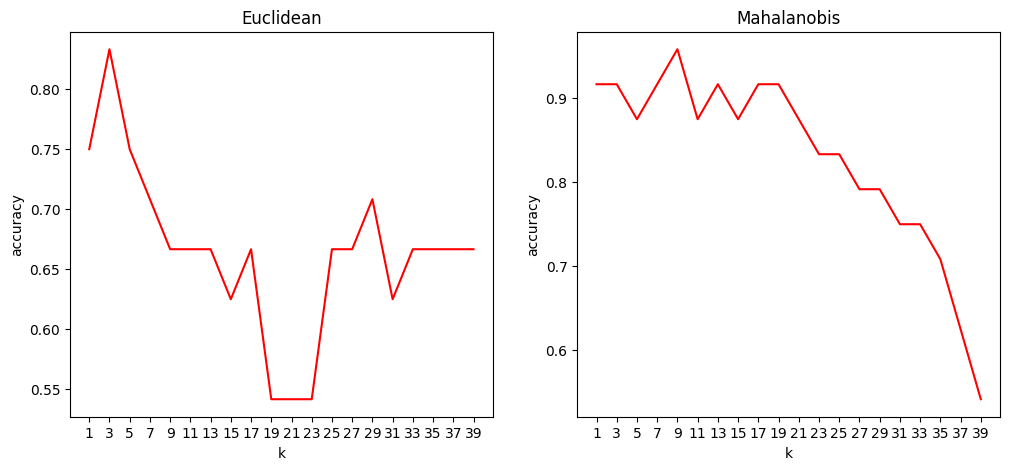

In [292]:
metrics = ['Euclidean', 'Mahalanobis']
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

for idx, metric in enumerate(metrics):

  ks = np.arange(1, 41, 2)
  accs = []
  for k in ks:
    c = kNN_classify(X_train, y_train, X_test, k, metric)
    accuracy = np.mean(c == y_test) #computing the accuracy using the current metric and k
    accs.append(accuracy)  #appending the accuracy to the list of accuracies

  axs[idx % 2].plot(ks, accs, color='red')
  axs[idx % 2].set_xlabel('k')
  axs[idx % 2].set_ylabel('accuracy')
  axs[idx % 2].set_title(metric)
  axs[idx % 2].set_xticks(ks)
plt.show()

Now, we implement the $L_p$ norm distance metric. Reminder:
$$ d(x,y)=||x-y||_p=\left(\sum_{i=1}^d |x_i-y_i|^p\right)^{\frac{1}{p}} $$
Remark: $L_1$ is the Manhattan distance and $L_2$ is the Euclidian.

In [293]:
def Minkowski(test, data, p):
  # Implement here
  distances = np.zeros((test.shape[0], data.shape[0])) #initiallizing distances matrix with size as the (number of test samples)*(number of training samples)
  for i in range(test.shape[0]):
      for j in range(data.shape[0]):
          distances[i, j] = np.sum(np.abs(test[i] - data[j])**p)**(1/p) #finding the distances between each test sample and train sample based on the given p

  return distances

Find the hyperparameter p that fits best to this problem (between 1-10)

In [294]:
# Implement here
p_range = np.arange(1, 11)

#initializing best_p and best_accuracy to hold the optimal p and the accuracy rate of that p respectively
best_p = None
best_accuracy = 0
best_p_values = {} #initiallizing an arrat that's going to hold the best p for each k

for k in ks:
  for p in p_range:
    predictions = kNN_classify(X_train, y_train, val_data, k, 'Minkowski', p)
    accuracy = np.mean(predictions == lbl_val) #computing the accuracy using the current p
    #if current accuracy is better than the one saved in best_accuracy update best_accuracy and best_p accordingly
    if accuracy > best_accuracy:
      best_p = p
      best_accuracy = accuracy
  best_p_values[k] = best_p #assign the optimal p for the current k to the matrix

#printing the best p for each l
for k, p in best_p_values.items():
    print(f"k={k}, p={p}")

# assigning the most common p in the best_p_values to best_p
best_p_array = np.array(list(best_p_values.values()))
unique, counts = np.unique(best_p_array, return_counts=True)
best_p = unique[np.argmax(counts)]

k=1, p=1
k=3, p=1
k=5, p=1
k=7, p=1
k=9, p=1
k=11, p=1
k=13, p=1
k=15, p=1
k=17, p=1
k=19, p=1
k=21, p=1
k=23, p=1
k=25, p=1
k=27, p=1
k=29, p=1
k=31, p=1
k=33, p=1
k=35, p=1
k=37, p=1
k=39, p=1


For that p, print the accuracy on the test as function of k. Is it really better  than the first two matrices? <br/>
<font color='red'>Write here your answer and explain it<br/>Minkowski shows better results compared to Euclidean for almost every k. In addition, its peak (the optimal k) achieves a higher accuracy level than the accuracy level that the peak of Euclidean achieves. This make sense considering that Euclidean is a special case of Minkowski.<br/>Conversely, compared to Mahalanobis, it appears that Mahalanobis yields better results, especially for low k values (up to around 20). The accuracy rate at the peak of Mahalanobis is also higher, though not by much. This might be because Mahalanobis takes into account the correlation between the different features. Furthermore, Mahalanobis shows more stability and fewer rapid changes of rises and falls as k increases, compared to Minkowski, which shows a trend more similar to what was mentioned previously regarding Euclidean.</font>

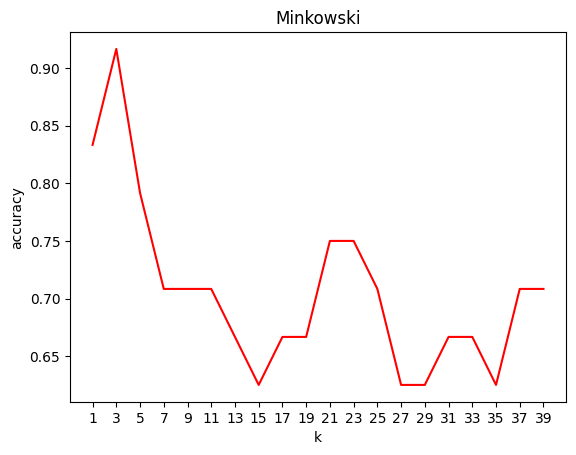

In [295]:
ks = np.arange(1, 41, 2) #Changed range from (1,30) to (1,41) so it be compatible with Eucledian and Mahalanobis graphs
accs = []
#creating a list of prediction accuracies based on the different values of k
for k in ks:
    c = kNN_classify(X_train, y_train, X_test, k, 'Minkowski',best_p)
    accuracy = np.mean(c == y_test)
    accs.append(accuracy)

#plotting the results
plt.plot(ks, accs, color='red', label='Minkowski')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('Minkowski')
plt.xticks(ks)
plt.show()

### Thats it!
If you choose to continue, 5 pts bonus!

We are going to classify the fashion MNIST data.<br/>
First, load the the train and test from:
- https://sharon.srworkspace.com/ml/datasets/hw1/fashion-mnist_train.csv
- https://sharon.srworkspace.com/ml/datasets/hw1/fashion-mnist_test.csv

Seconly, convert it to numpy and obtain the train and test data & labels

In [296]:
# Implement here

first_url = "https://sharon.srworkspace.com/ml/datasets/hw1/fashion-mnist_train.csv"
second_url = "https://sharon.srworkspace.com/ml/datasets/hw1/fashion-mnist_test.csv"

#loading the test and train data from the provided links
train_data = pd.read_csv(first_url)
test_data = pd.read_csv(second_url)

#converting the data frames into NumPy arrays
train_data = train_data.to_numpy()
test_data = test_data.to_numpy()

#obtaining the train and test data & labels
X_train = train_data[:, 1:]
y_train = train_data[:, 0]
X_test = test_data[:, 1:]
y_test = test_data[:, 0]


dispaly some random image

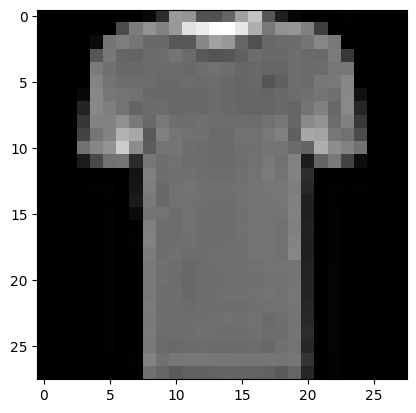

In [297]:
idx = np.random.randint(len(X_train))
plt.imshow(X_train[idx].reshape(28,28), cmap='gray')
plt.show()

Use some google to search for appropriate distance metric that should classify correctly images. From what you read, explain yourselves, why is it a good distance metric?<br/>
<font color='red'>Write here your answer and explain it<br/>Based on the nature of the provided photo which we assume to represent the type of photos in the given data, we decided to choose Euclidian distance metric due to its ability to deal with grayscale image where colors consist of ranges of gray and its capability in measuring straight-line distances, In addition to its simplicity and intuitiveness.</font>

Now, use the sklearn package of KNN with the metric you chose and print a graph of accuracy on the test, as function of k.<br/>
Were you correct?
<br/>
<font color='red'>In my optinion, we were right to a large extent due to the high accuracy (around 0.967) achieved for the optimal k. </font>

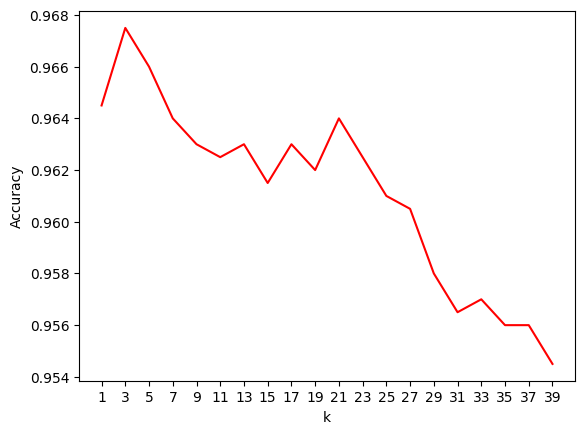

In [298]:
from sklearn.neighbors import KNeighborsClassifier

# Implement here

ks = np.arange(1, 41, 2)  #the range of k's I'm going to check
accuracies = [] #initiallizing accuracies array

for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean') #Creating a KNN classifier based on the current k and Euclidian distance metric
    knn.fit(X_train, y_train) #fitting the created classifier to the given training data
    accuracy = knn.score(X_test, y_test) #computing the accuracy of the KNN classifier on the test data
    accuracies.append(accuracy) #appending the accuracy to the accuracies array

#plotting the results
plt.plot(ks, accuracies, color='red')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(ks)
plt.show()


## Question 4 - Parzen Windoes
See attached PDF in Moodle